In [ ]:
!nvidia-smi

Tue Dec 10 02:15:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 24.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 911, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'track', 'val', 'benchmark', 'predict', 'train', 'export'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'obb', 'pose', 'detect', 'segment', 'classify'}
                MODE (required) is one of {'track', 'val', 'benchmark', 'predict', 'train', 'export'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="r2tVeGW8kcAFzcMUF1St")
project = rf.workspace("bogart").project("volleyballgame")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to VolleyballGame-2 in yolov8:: 100%|██████████| 278/278 [00:00<00:00, 3859.24it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640 plots=True

100% 49.7M/49.7M [00:00<00:00, 286MB/s]
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/VolleyballGame-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

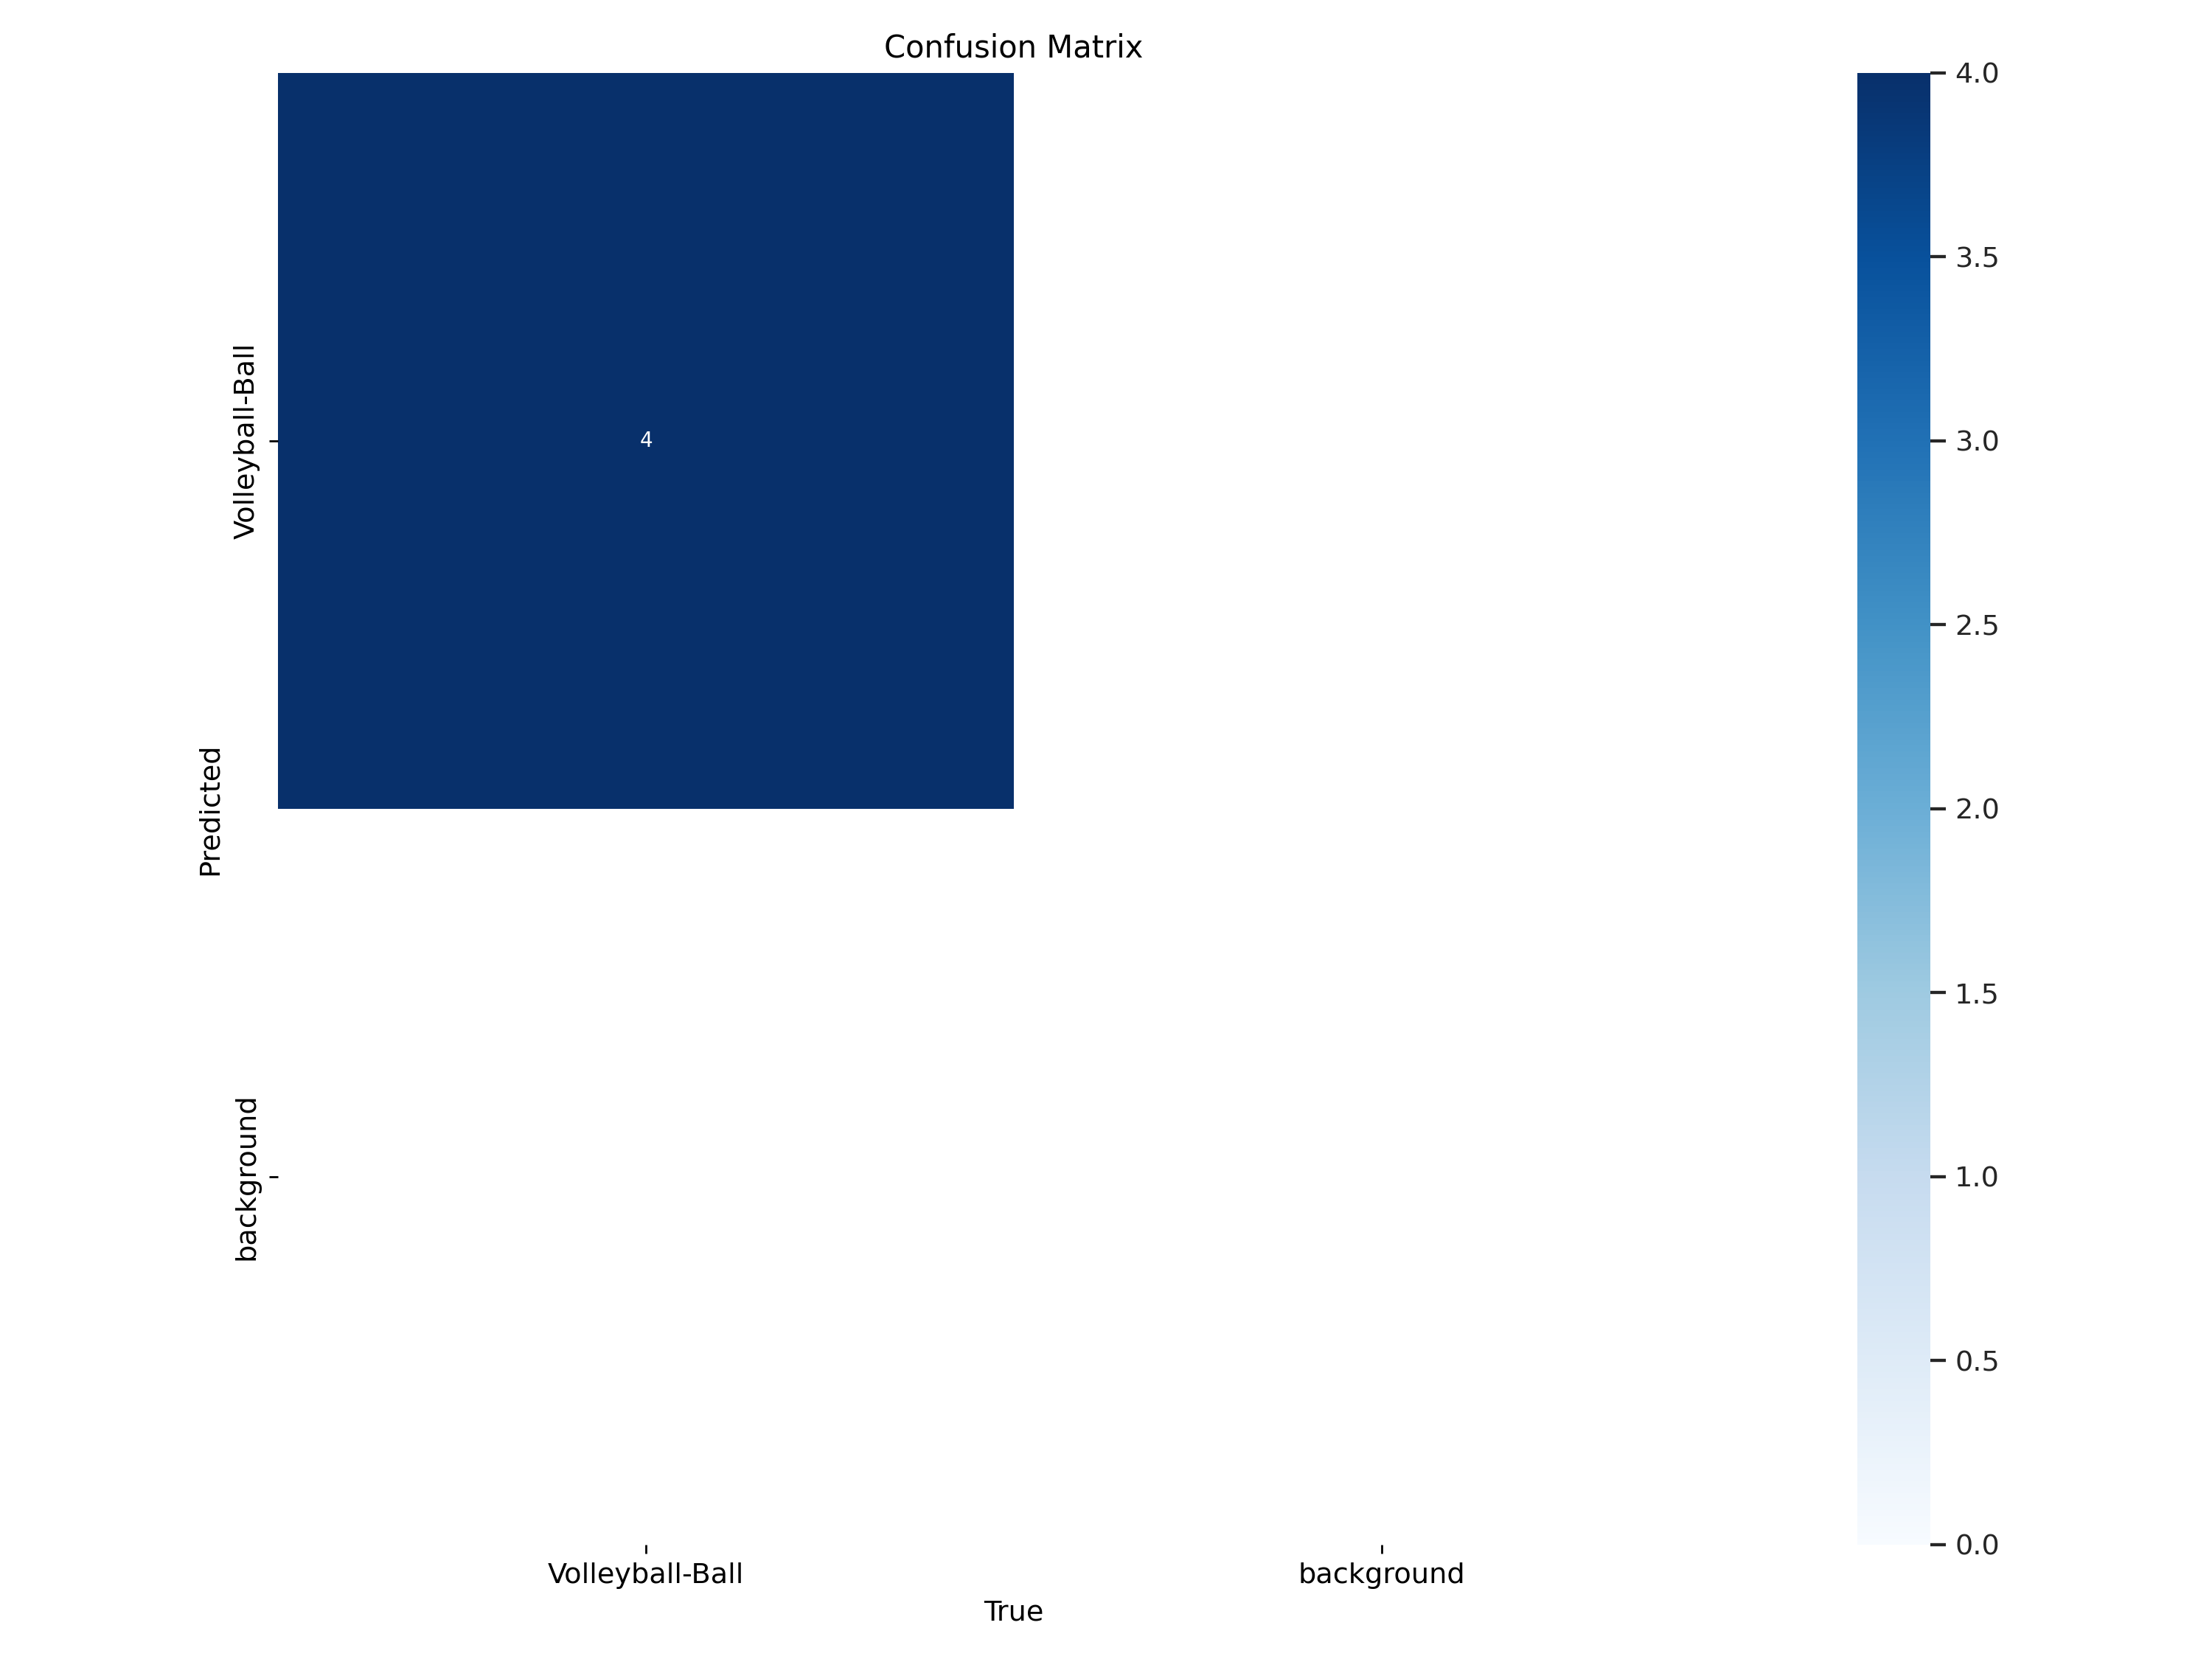

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png')

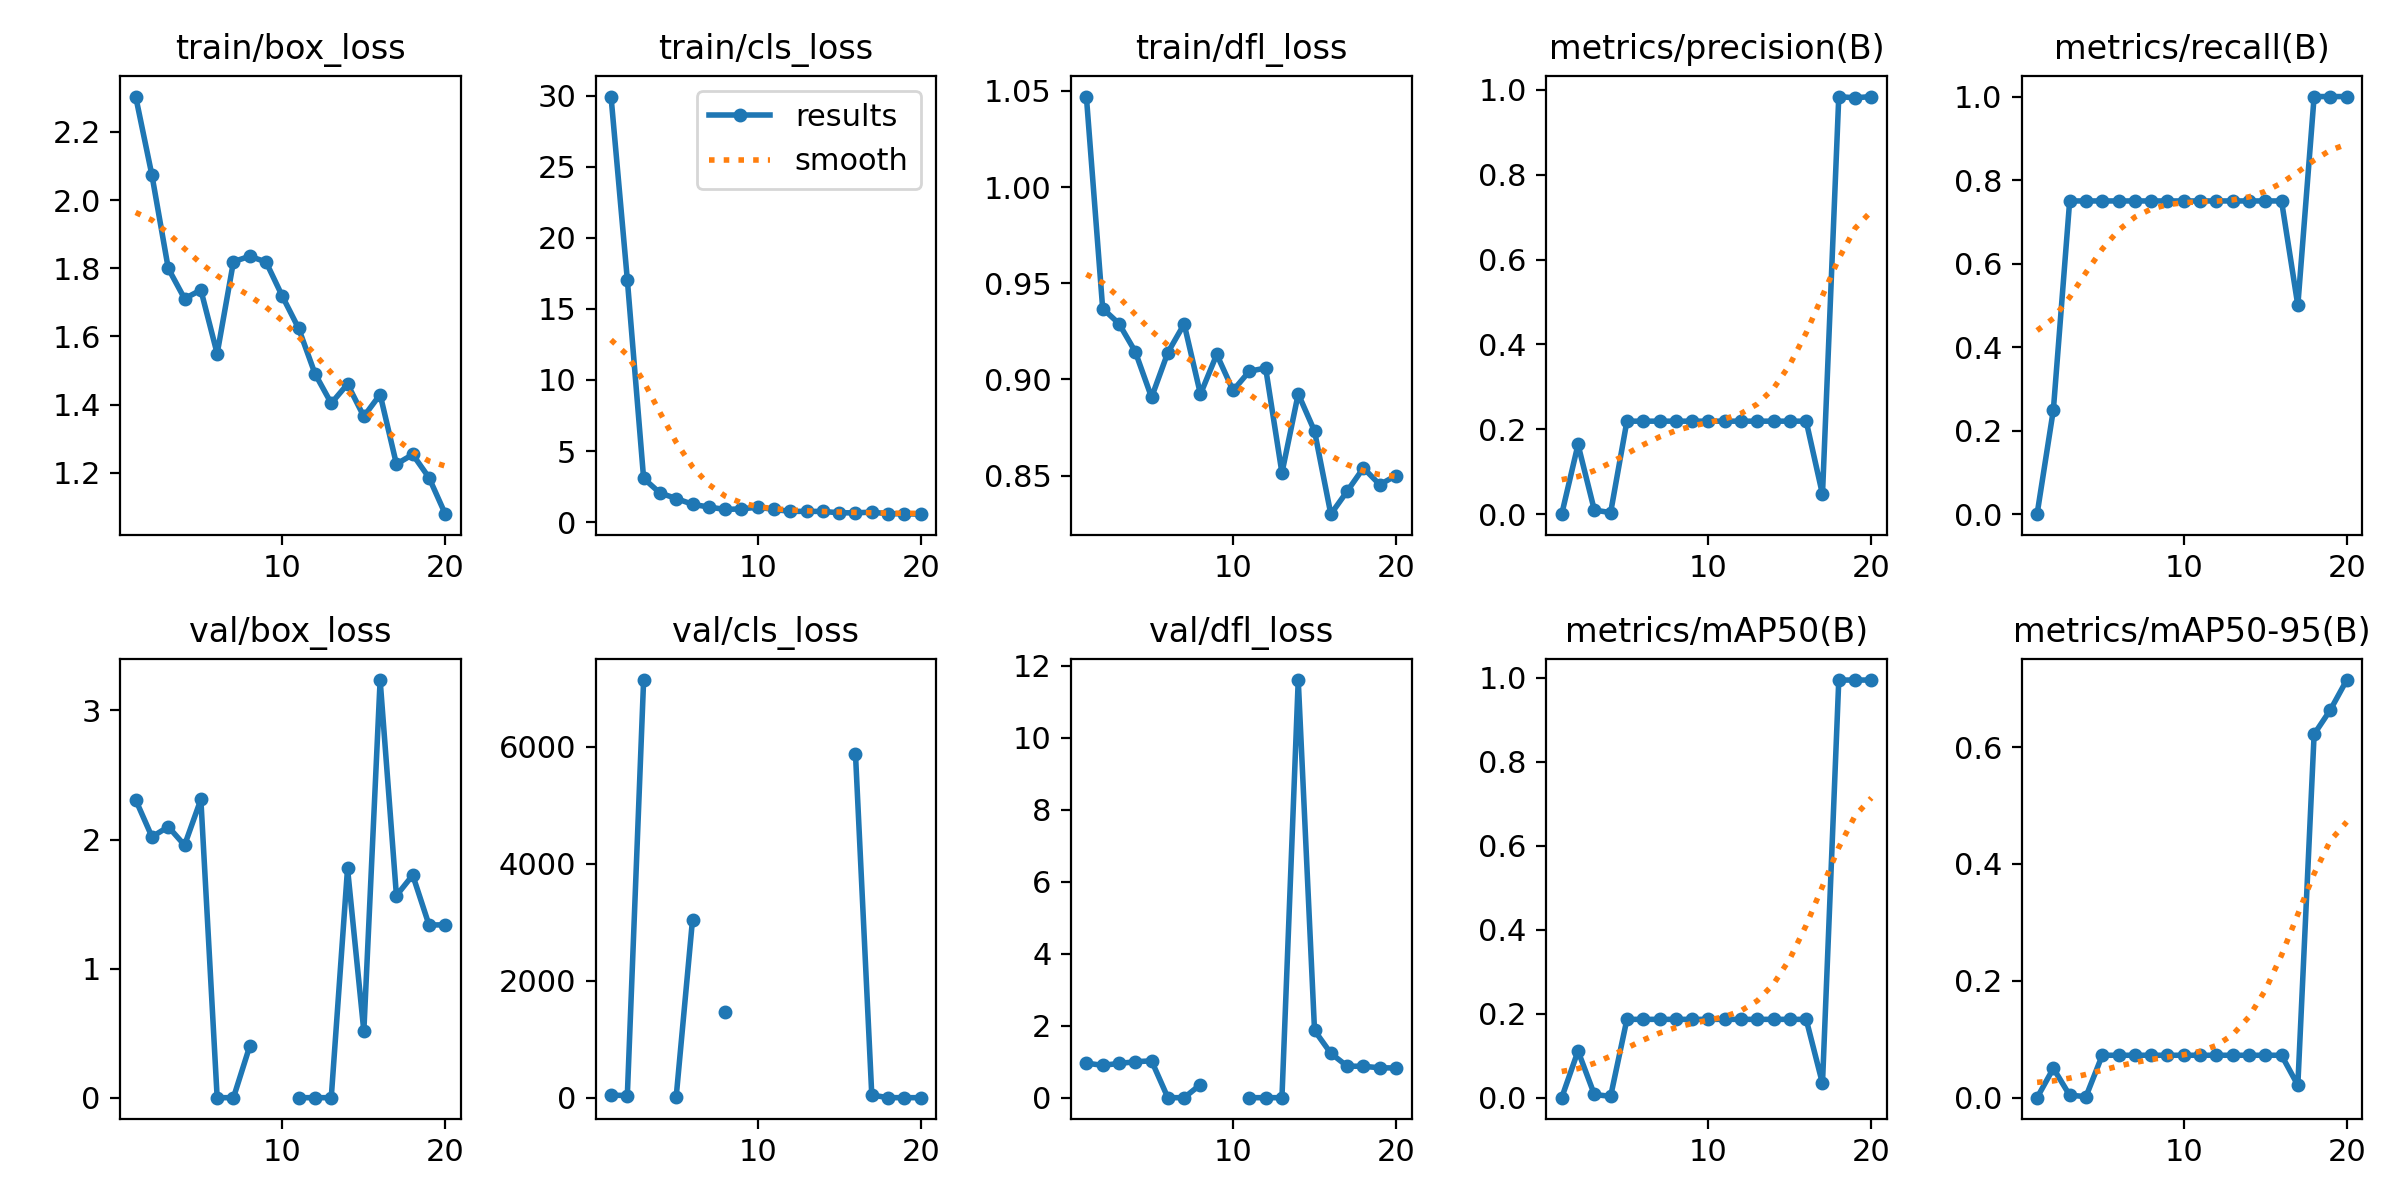

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png')

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/VolleyballGame-2/valid/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.18it/s]
                   all          4          4      0.984          1      0.995      0.698
Speed: 3.1ms preprocess, 41.3ms inference, 0.0ms loss, 137.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/9 /content/VolleyballGame-2/test/images/VOLLEYBALL-GAME_mp4-0003_jpg.rf.bd591dc3064042f899dbbee1e62c5b46.jpg: 640x640 1 Volleyball-Ball, 36.2ms
image 2/9 /content/VolleyballGame-2/test/images/VOLLEYBALL-GAME_mp4-0008_jpg.rf.51ca4e4e75d1e9faf5ab470ad757b71a.jpg: 640x640 1 Volleyball-Ball, 36.2ms
image 3/9 /content/VolleyballGame-2/test/images/VOLLEYBALL-GAME_mp4-0012_jpg.rf.d3a13ca9781225f4307d4911fd01ecbd.jpg: 640x640 2 Volleyball-Balls, 36.2ms
image 4/9 /content/VolleyballGame-2/test/images/VOLLEYBALL-GAME_mp4-0019_jpg.rf.3fe046fda6983f1f2127cb40c6cc6bf9.jpg: 640x640 1 Volleyball-Ball, 36.2ms
image 5/9 /content/VolleyballGame-2/test/images/VOLLEYBALL-GAME_mp4-0026_jpg.rf.42d1752369ec15ab18afeb6f7017046f.jpg: 640x640 1 Volleyball-Ball, 33.7ms
image 6/9 /content/VolleyballGame-2/test/images/VOLLEYBALL-GAME_mp4-0029_

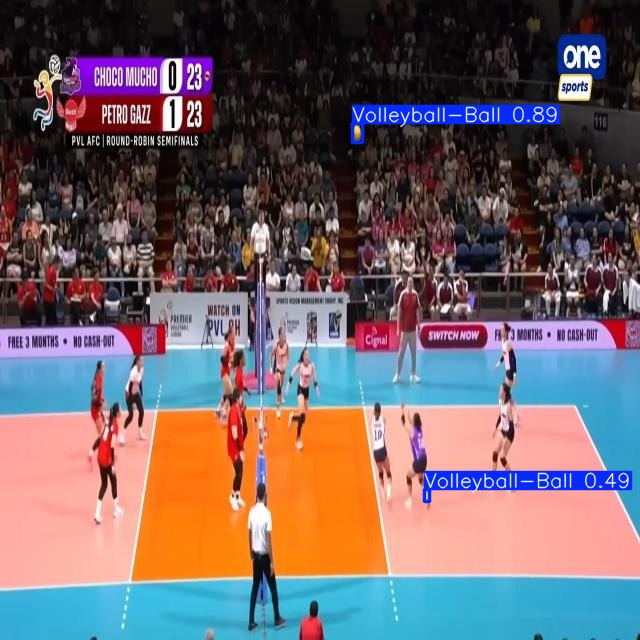

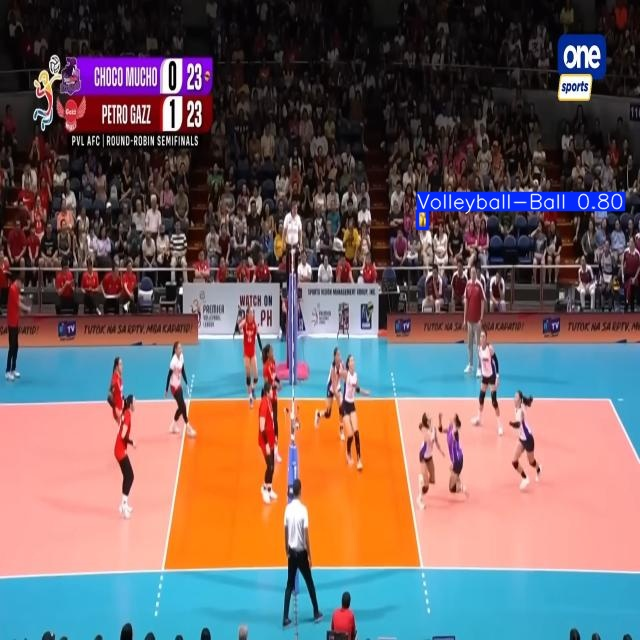

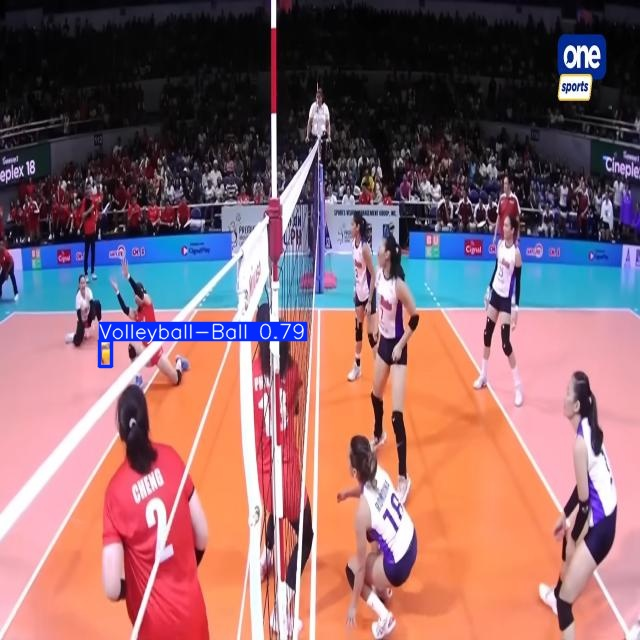

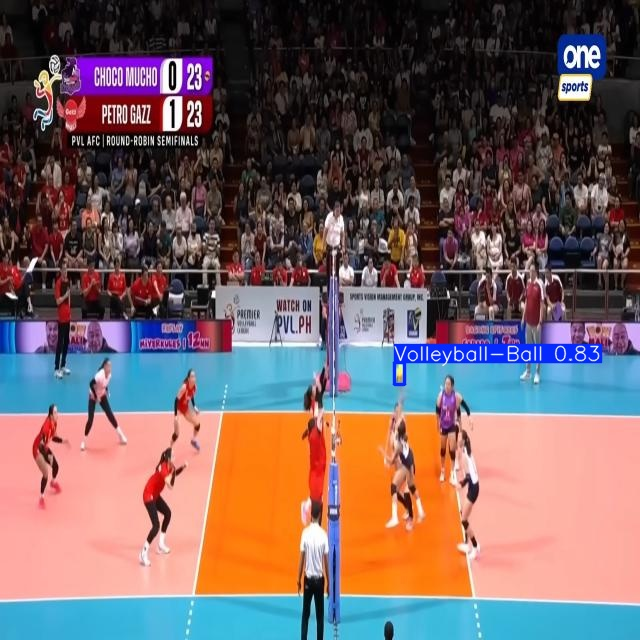

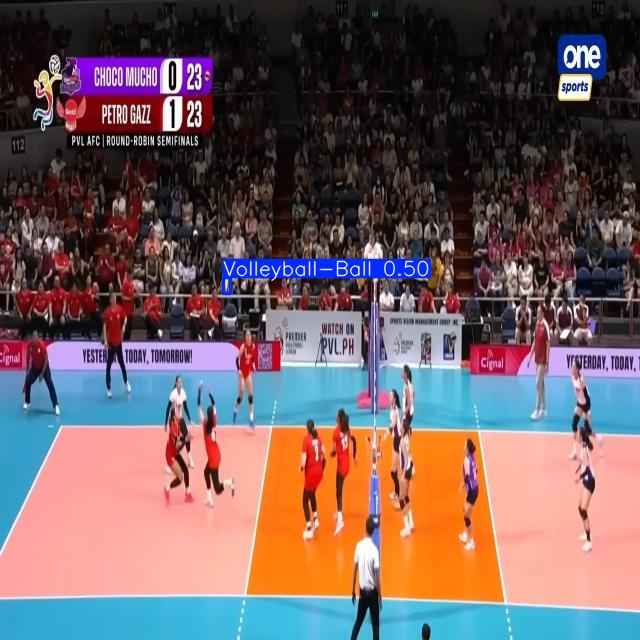

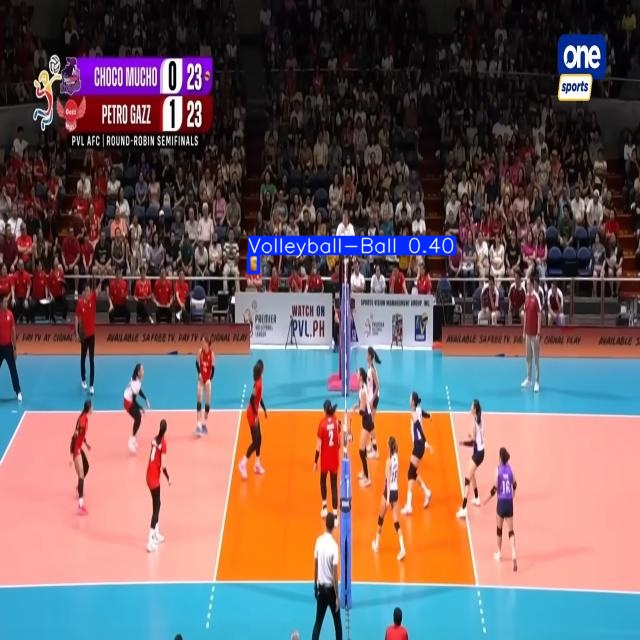

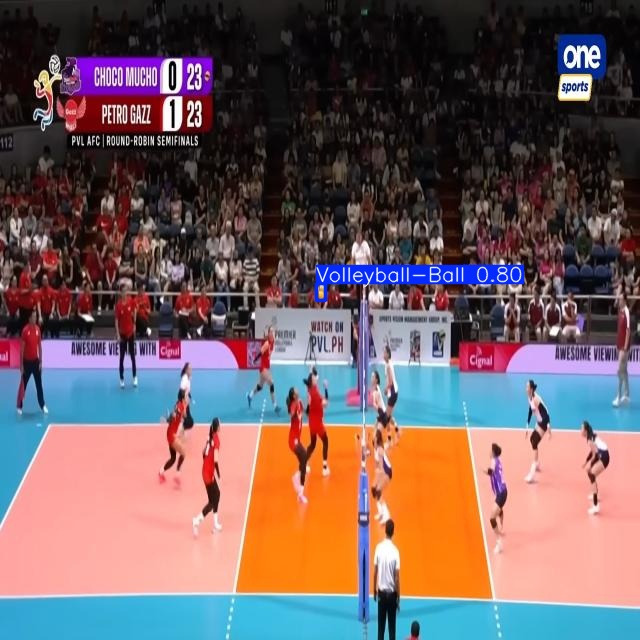

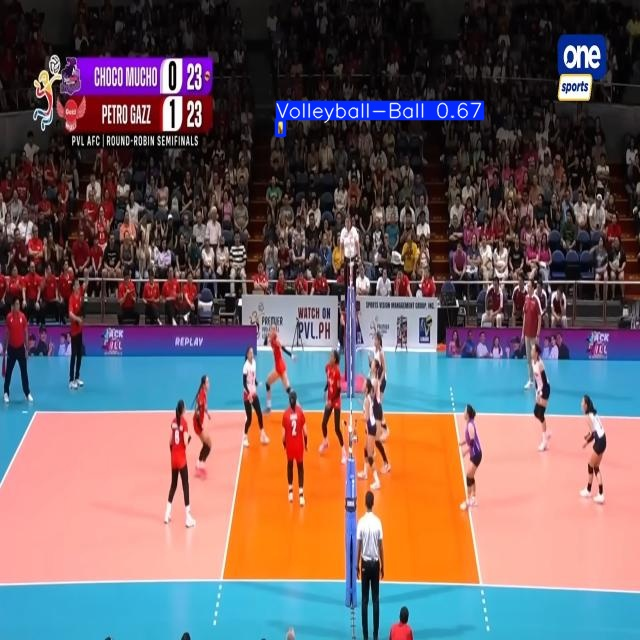

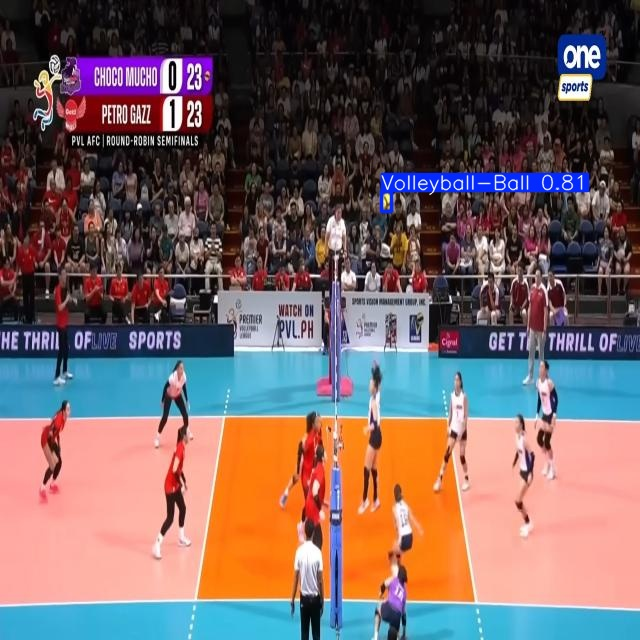

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, width=600))
  print("\n")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Volleyball Game.m4v to Volleyball Game.m4v


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the pre-trained YOLOv8 model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Replace with your model path

# Function to draw bounding boxes
def draw_boxes(img, results):
    for box in results:
        x1, y1, x2, y2 = map(int, box[:4])
        conf = box[4]
        cls = int(box[5])  # Class ID
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(
            img,
            f"Volleyball {cls}: {conf:.2f}",
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2,
        )

# Load your video
cap = cv2.VideoCapture('Volleyball Game.m4v')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Inference with YOLOv8
    results = model(frame)

    # Get bounding boxes (xyxy format) from the results
    boxes = results[0].boxes.xyxy.cpu().numpy()  # Convert to numpy for easier handling
    confidences = results[0].boxes.conf.cpu().numpy()  # Confidence scores
    classes = results[0].boxes.cls.cpu().numpy()  # Class IDs

    # Combine boxes, confidences, and classes
    detections = np.column_stack((boxes, confidences, classes))

    # Draw bounding boxes around detected objects
    draw_boxes(frame, detections)


  # Display the frame using matplotlib
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Frame')
    plt.show()

cap.release()
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

In [36]:
import torch
import cv2
import numpy as np
from ultralytics import YOLO

def draw_boxes(img, results):
    for *xyxy, conf, cls in results:
        x1, y1, x2, y2 = int(xyxy[0]), int(xyxy[1]), int(xyxy[2]), int(xyxy[3])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, f"Volleyball: {conf:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Load the pre-trained YOLOv8 model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Load your video
cap = cv2.VideoCapture('Volleyball Game.m4v')

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output_video.mp4', fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Inference with YOLOv8
    results = model(frame)

    # Get bounding boxes
    boxes = results[0].boxes.xyxy.cpu().numpy()
    confidences = results[0].boxes.conf.cpu().numpy()
    classes = results[0].boxes.cls.cpu().numpy()
    detections = np.column_stack((boxes, confidences, classes))

    # Draw bounding boxes around detected objects
    draw_boxes(frame, detections)

    # Write the frame to the output video
    out.write(frame)

cap.release()
out.release()

Streaming output truncated to the last 5000 lines.
0: 384x640 2 Volleyball-Balls, 16.0ms
Speed: 2.8ms preprocess, 16.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.9ms
Speed: 2.8ms preprocess, 15.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Volleyball-Balls, 15.9ms
Speed: 2.8ms preprocess, 15.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Volleyball-Ball, 16.0ms
Speed: 2.8ms preprocess, 16.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Volleyball-Ball, 15.9ms
Speed: 2.9ms preprocess, 15.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Volleyball-Ball, 15.9ms
Speed: 3.0ms preprocess, 15.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Volleyball-Balls, 15.9ms
Speed: 2.8ms preprocess, 15.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 

In [38]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:

import os
import shutil



# Specify the desired Google Drive folder path
output_folder = '/content/drive/MyDrive/VolleyballTracking/'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Define source folders (replace with actual paths)
source_folders = ["VolleyballGame-2","runs"]

# Copy folders to Google Drive
for source_folder in source_folders:
    source_path = os.path.join(os.getcwd(), source_folder)
    destination_path = os.path.join(output_folder, source_folder)
    if os.path.exists(source_path):
        shutil.copytree(source_path, destination_path)
        print(f"Copied '{source_folder}' to Google Drive.")
    else:
        print(f"Warning: '{source_folder}' not found.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Copied 'VolleyballGame-2' to Google Drive.
Copied 'runs' to Google Drive.


In [37]:
import shutil

output_folder = '/content/drive/MyDrive/VolleyballTracking/'
file_paths = [
    '/content/Volleyball Game.m4v',
    '/content/yolo11n.pt',
    '/content/yolov8m.pt',
    '/content/output_video.mp4'

]



for file_path in file_paths:
    if os.path.exists(file_path):
        filename = os.path.basename(file_path)
        destination_path = os.path.join(output_folder, filename)
        shutil.copy(file_path, destination_path)
        print(f"Copied '{filename}' to Google Drive.")
    else:
        print(f"Warning: '{file_path}' not found.")

Copied 'Volleyball Game.m4v' to Google Drive.
Copied 'yolo11n.pt' to Google Drive.
Copied 'yolov8m.pt' to Google Drive.
Copied 'output_video.mp4' to Google Drive.
